In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
Qsg = 700
hs = 12
File1 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf' + str(format(Qsg,'03d')) + '_rot/state_' + str(format(hs,'03d')) + '.nc')
T0 = 0 # or 81/275 for one/two week run
Tn = len(File1.T)
State1 = File1.isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(T0,Tn))


File2 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf' + str(format(Qsg,'03d')) + '_long/state_' + str(format(hs,'03d')) + '.nc')
State2 = File2.isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(T0,Tn))


State1.Z.data[14]

-9.5

In [3]:
t = np.array([24, 120, 240]) #Time

#z = np.array([0, 15]) #Depth layer
z = 23


X = State1.X.data / 1000
Y = State1.Y.data
#pt = State1.Temp.data[:,z[0],:,:]
#s = State1.S.data[:,z[0],:,:]

#u0 = State1.U.data
ux1 = (State1.U.data[:, :, :, 1:] + State1.U.data[:, :, :, :-1]) / 2 #Convert Xp1(grid corner) to X(grid center)
ux2 = (State2.U.data[:, :, :, 1:] + State2.U.data[:, :, :, :-1]) / 2 #Convert Xp1(grid corner) to X(grid center)

u1 = ux1[:,z,:,:] #dims=T,Y,X
u2 = ux2[:,z,:,:]

#v0 = State1.V.data
vy1 = (State1.V.data[:, :, 1:, :] + State1.V.data[:, :, :-1, :]) / 2 #Convert Yp1(grid corner) to Y(grid center)
vy2 = (State2.V.data[:, :, 1:, :] + State2.V.data[:, :, :-1, :]) / 2 #Convert Yp1(grid corner) to Y(grid center)

v1 = vy1[:,z,:,:]
v2 = vy2[:,z,:,:]
#State1.T.data/3600
State1.Z.data[23]

-20.25

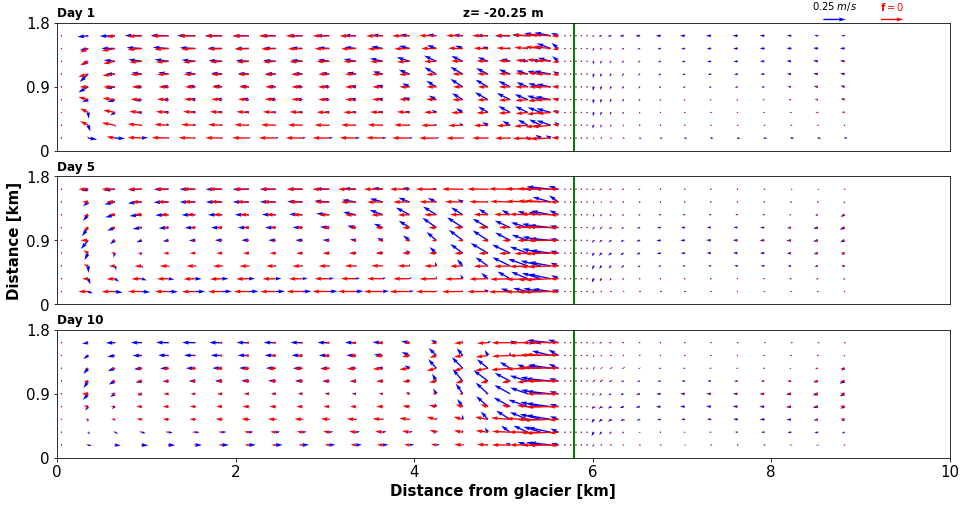

In [4]:
#u1[:,:,::2] = np.nan
#v1[:,:,::2] = np.nan
#u2[:,:,::2] = np.nan
#v2[:,:,::2] = np.nan
skip=(slice(None,None,3))


fig_path = "/Users/weiyangbao/Documents/Results_Figs/PlaneView/"
#fig_path = "/home/1959/Jupyter_Figs/sill30/Along_fjord_animation_Qf0200/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig = plt.figure(figsize=(16,8))
fig.tight_layout()
# Plot time 1 velocity field
ax1 = fig.add_subplot(311)
Q_11 = ax1.quiver(X[skip],Y,u1[t[0],:,skip], v1[t[0],:,skip],scale=10, width=0.0015, color='b')
Q_12 = ax1.quiver(X[skip],Y,u2[t[0],:,skip], v2[t[0],:,skip],scale=10, width=0.0015, color='r')
ax1.set_xlim([0,10])
ax1.axvline(x=X[71],color='g',linewidth=2)
plt.yticks(fontsize = 15)
ax1.quiverkey(Q_11, 0.8, 0.886, 0.25,r'0.25 $m/s$', fontproperties={'size' : 10}, coordinates='figure')
#ax1.quiverkey(Q_12, 0.85, 0.886, 0.15,r'0.15 $m/s$', fontproperties={'weight': 'bold', 'size' : 10}, coordinates='figure')
ax1.quiverkey(Q_12, 0.85, 0.886, 0.25,r'$\mathbf{f}=0$', fontproperties={'size' : 10}, coordinates='figure', labelcolor='r')
ax1.set_title('Day ' + str(format(t[0]/24,'.0f')), loc='left', weight='bold')
ax1.set_title('z= ' + str(State1.Z.data[z]) + ' m', loc='center', weight='bold')
ax1.axes.get_xaxis().set_visible(False)
dy = 200
ax1.set_yticks([Y[0]-dy, Y[4], Y[8]+dy])
ax1.set_yticklabels(["0","0.9","1.8"], size=15)

# Plot time 2 velocity field
ax2 = fig.add_subplot(312)
Q_21 = ax2.quiver(X[skip],Y,u1[t[1],:,skip], v1[t[1],:,skip],scale=10, width=0.0015, color='b')
Q_22 = ax2.quiver(X[skip],Y,u2[t[1],:,skip], v2[t[1],:,skip],scale=10, width=0.0015, color='r')
ax2.set_xlim([0,10])
ax2.axvline(x=X[71],color='g',linewidth=2)
plt.yticks(fontsize = 15)
ax2.set_ylabel('Distance [km]', size = 15, weight = 'bold')
ax2.set_title('Day ' + str(format(t[1]/24,'.0f')), loc='left', weight='bold')
ax2.axes.get_xaxis().set_visible(False)
ax2.set_yticks([Y[0]-dy, Y[4], Y[8]+dy])
ax2.set_yticklabels(["0","0.9","1.8"], size=15)


# Plot time 3 velocity field
ax3 = fig.add_subplot(313)
Q_31 = ax3.quiver(X[skip],Y,u1[t[2],:,skip], v1[t[2],:,skip],scale=10, width=0.0015, color='b')
Q_32 = ax3.quiver(X[skip],Y,u2[t[2],:,skip], v2[t[2],:,skip],scale=10, width=0.0015, color='r')
ax3.set_xlim([0,10])
ax3.axvline(x=X[71],color='g',linewidth=2)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax3.set_title('Day ' + str(format(t[2]/24,'.0f')), loc='left', weight='bold')
ax3.set_xlabel('Distance from glacier [km]', size = 15, weight = 'bold')
ax3.set_yticks([Y[0]-dy, Y[4], Y[8]+dy])
ax3.set_yticklabels(["0","0.9","1.8"], size=15)
#plt.close()
fig.savefig(fig_path + 'Plan' + str(z) + '.png', dpi=200, bbox_inches='tight')